# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [32]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [33]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5739410000000,5,Urban
1,South Michelleport,2019-03-04,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2005070000000,57,Urban
3,Rodneyfort,2019-02-10,23.44,5149250000000,34,Urban
4,South Jack,2019-03-06,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [34]:
#  1. Get the total rides for each city type
rides_by_type=pyber_data_df.groupby(["type"]).count()["ride_id"]

In [35]:
# 2. Get the total drivers for each city type
drivers_by_type=city_data_df.groupby(["type"]).sum()["driver_count"] 

In [36]:
#  3. Get the total amount of fares for each city type
fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]

In [37]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride=fares_by_type/rides_by_type

In [38]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver=fares_by_type/drivers_by_type

In [39]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({
    "Total Rides": rides_by_type,
    "Total Drivers": drivers_by_type,
    "Total Fares": fares_by_type,
    "Average Fare per Ride": avg_fare_per_ride,
    "Average Fare per Driver": avg_fare_per_driver})

In [40]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [41]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [42]:
# 1. Read the merged DataFrame


In [43]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_type_date_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

In [44]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_type_date_df = fares_by_type_date_df.reset_index()

In [45]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_type_date_pivot = fares_by_type_date_df.pivot(index="date", columns="type", values="fare")
fares_type_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
2019-01-06,47.33,62.63,202.40
2019-01-07,NaN,155.01,218.02
2019-01-08,19.39,56.82,379.79
2019-01-09,31.84,150.67,231.34


In [46]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_April_df = fares_type_date_pivot.loc['2019-01-01':'2019-04-29']
fares_Jan_April_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [48]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_Jan_April_df.index=pd.to_datetime(fares_Jan_April_df.index)

In [49]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_Jan_April_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [51]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_Jan_April_df=fares_Jan_April_df.resample("W").sum()

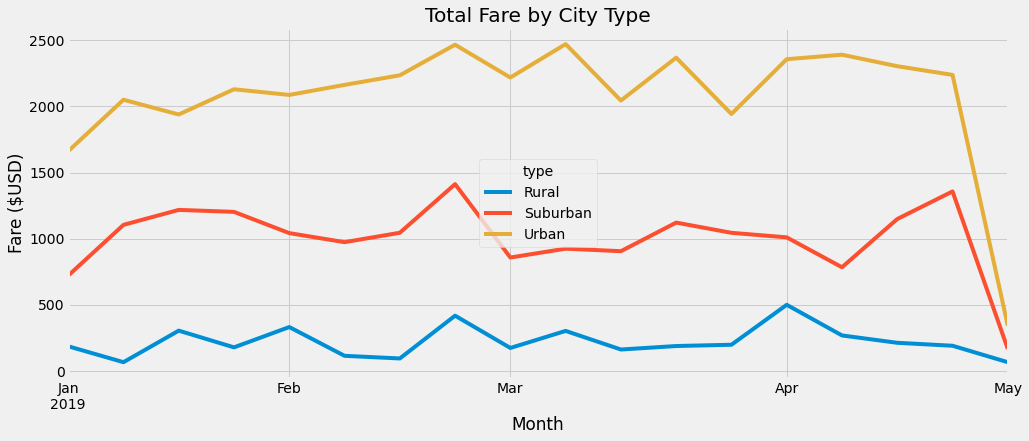

In [56]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax=fares_Jan_April_df.plot(figsize=(15,6))
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Month")
ax.set_title("Total Fare by City Type")
lgnd=plt.legend(loc="center",title="type")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig("analysis/Pyber_fare_summary.png")
plt.show()

